In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
f=pd.read_csv("Spotify_Dataset_V3.csv",delimiter=";")
#print(df.head())
#f.head() shows there are some columns in the dataset that are irrelevant to this project
#Preparing the dataset by removing unnecessary columns:
#f = f.drop(["# of Artist","# of Nationality","Points (Total)","Points (Ind for each Artist/Nat)","Artist (Ind.)",],axis=1)
f = f.drop(["# of Artist","# of Nationality","Points (Total)","Points (Ind for each Artist/Nat)","Artist (Ind.)",],axis=1)

In [3]:
#df = f.loc[0:19999,]
df = f
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,United Kingdom,Europe,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,United States,Anglo-America,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Canada,Anglo-America,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,United States,Anglo-America,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


for i,values in df.items():
    if i=="# of Artist":
    
        print(f'{i} - {df[i].unique()}', end='\n\n')


for x in df.loc[:,"id"].unique():
    df["Nationality"] = str(set(list(df[df["id"]==x]["Nationality"])[:11]))
    df["Continent"] = str(set(list(df[df["id"]==x]["Continent"])[:11]))
#for i,row in df.iterrows():
    #if df.loc[i,"Rank"] == df.loc[i+1,"Rank"]:

rdf = pd.DataFrame(columns = list(df.columns))
count =0 
for i,row in df.iterrows():
    if df.loc[i,"Rank"] != df.loc[i+1,"Rank"]:
        rdf.loc[len(rdf.index)] = df.loc[i+1,:]

df = rdf

df

In [4]:
i = 0
count = 0
maxd = len(df.index)
#print(max)
for i,row in df.iterrows():
    if i-count+1>=maxd:
        break
    else:
        if df.iloc[i-count,]["Rank"] == df.iloc[i+1-count,]["Rank"]:
            temp = row
            if df.iloc[i-count,]["Nationality"] != df.iloc[i+1-count,]["Nationality"]:
                temp["Nationality"] = df.iloc[i-count,]["Nationality"]+","+df.iloc[i+1-count,]["Nationality"]
            if df.iloc[i-count,]["Continent"] != df.iloc[i+1-count,]["Continent"]:
                temp["Continent"] = df.iloc[i-count,]["Continent"]+","+df.iloc[i+1-count,]["Continent"]
            row = temp
            df = df.drop([i+1], axis=0, inplace=False)
            maxd = maxd-1
            count = count + 1
       
df       

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
5,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,South Korea,Asia,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
6,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Mexico,Latin-America,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651930,196,White Iverson,Post Malone,01/01/2017,0.675,0.562,-7678.0,0.035,0.233,0.000,0.309,United States,Anglo-America,6eT7xZZlB2mwyzJ2sUKG6w,https://open.spotify.com/track/6eT7xZZlB2mwyzJ...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,United Kingdom,Europe,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,United States,Anglo-America,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Canada,Anglo-America,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...


df.index

i = 0
#count = 0
#max = len(df.index)
#print(max)
n=0
for j,row in df.iterrows():
    if i+1>=len(df.index):
        break
    else:
        if n==1:
            df.drop([i,], axis=0, inplace=True)
            n=0
        if df.iloc[i,:]["Rank"] == df.iloc[i+1,:]["Rank"]:
            temp = df.iloc[i,:]
            if df.iloc[i,:]["Nationality"] != df.iloc[i+1,:]["Nationality"]:
                temp["Nationality"] = df.iloc[i,:]["Nationality"]+","+df.iloc[i+1,:]["Nationality"]
            if df.iloc[i,:]["Continent"] != df.iloc[i+1,:]["Continent"]:
                temp["Continent"] = df.iloc[i,:]["Continent"]+","+df.iloc[i+1,:]["Continent"]
            df.iloc[i,:] = temp
            n = 1
            i=i+1
       
df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467065 entries, 0 to 651934
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Rank              467065 non-null  int64  
 1   Title             467065 non-null  object 
 2   Artists           467065 non-null  object 
 3   Date              467065 non-null  object 
 4   Danceability      467065 non-null  float64
 5   Energy            467065 non-null  float64
 6   Loudness          467065 non-null  float64
 7   Speechiness       467065 non-null  float64
 8   Acousticness      467065 non-null  float64
 9   Instrumentalness  467065 non-null  float64
 10  Valence           467065 non-null  float64
 11  Nationality       467065 non-null  object 
 12  Continent         467065 non-null  object 
 13  id                467065 non-null  object 
 14  Song URL          467065 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 57.0+ MB


In [6]:
df.isnull().sum()


Rank                0
Title               0
Artists             0
Date                0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
Nationality         0
Continent           0
id                  0
Song URL            0
dtype: int64

In [7]:
df.describe(include='all')

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,id,Song URL
count,467065.000000,467065,467065,467065,467065.000000,467065.000000,467065.000000,467065.000000,467065.000000,467065.000000,467065.000000,467065,467065,467065,467065
unique,NaN,7440,2921,2336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,7,9161,9161
top,NaN,Believer,Ed Sheeran,29/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Anglo-America,0tgVpDi06FyKpA1z0VMD4v,https://open.spotify.com/track/0tgVpDi06FyKpA1...
freq,NaN,2297,12289,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222308,257249,2251,2251
mean,100.498203,NaN,NaN,NaN,0.688590,0.636900,-5512.968854,0.108037,0.238650,0.008960,0.504834,NaN,NaN,NaN,NaN
std,57.737600,NaN,NaN,NaN,0.138357,0.160356,2870.578876,0.097989,0.242179,0.059458,0.225143,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,NaN,NaN,NaN,NaN
25%,50.000000,NaN,NaN,NaN,0.601000,0.532000,-7066.000000,0.043000,0.048000,0.000000,0.335000,NaN,NaN,NaN,NaN
50%,100.000000,NaN,NaN,NaN,0.707000,0.652000,-5482.000000,0.066000,0.154000,0.000000,0.497000,NaN,NaN,NaN,NaN
75%,151.000000,NaN,NaN,NaN,0.789000,0.761000,-4066.000000,0.131000,0.357000,0.000000,0.679000,NaN,NaN,NaN,NaN


df.to_csv('current.csv')

In [75]:
df=pd.read_csv("current.csv")
df = df.drop("Unnamed: 0",axis = 1)
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,South Korea,Asia,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Mexico,Latin-America,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467060,196,White Iverson,Post Malone,01/01/2017,0.675,0.562,-7678.0,0.035,0.233,0.000,0.309,United States,Anglo-America,6eT7xZZlB2mwyzJ2sUKG6w,https://open.spotify.com/track/6eT7xZZlB2mwyzJ...
467061,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,United Kingdom,Europe,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
467062,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,United States,Anglo-America,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
467063,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Canada,Anglo-America,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...


count = 0
uid = []
ans = [[] for _ in range(6)]
ic = 0
maxrank = 200
minrank = 1
avgrank = 100
for i, row in df.iterrows():
    #print(ic)
    ID = df.iloc[ic]["id"]
    maxrank = df.iloc[ic]["Rank"]
    minrank = df.iloc[ic]["Rank"]
    avgrank = df.iloc[ic]["Rank"]
    count = 1
    if ID not in uid:
        start_date = df.iloc[ic]["Date"]
        uid.append(ID)
        jc = 0
        for j , row2 in df.iterrows():
            #print(jc)
            if (jc!=ic):
                if(df.iloc[jc]["id"]==ID):
                    count = count + 1
                    #print(df.iloc[jc]["Date"])
                    last_date = df.iloc[jc]["Date"]
                    #df = df.drop([j],axis=0, inplace=False)
                    if df.iloc[jc]["Rank"]<maxrank:
                        maxrank = df.iloc[jc]["Rank"]
                    if df.iloc[jc]["Rank"]>minrank:
                        minrank = df.iloc[jc]["Rank"]
                    avgrank = avgrank + df.iloc[jc]["Rank"]

            jc = jc + 1
            if jc == len(df.index):
                break
    ans[0].append(count)
    ans[1].append(start_date)
    if count ==1:
        last_date = start_date
    ans[2].append(last_date)
    ans[3].append(maxrank)
    ans[4].append(minrank)
    ans[5].append(avgrank/count)
    ic = ic + 1
    if ic == len(df.index):
        break
#ans[0].append(1)
#ans[1].append(1)
#ans[2].append(1)
df = df.assign(Start_Date = ans[2])
df = df.assign(Last_Date = ans[1])
df = df.assign(MaxRank = ans[3])
df = df.assign(MinRank = ans[4])
df = df.assign(AvgRank = ans[5])
df = df.assign(DaysinTop200 = ans[0])
        
df
    

In [46]:
ans = [[] for _ in range(6)]
for x in df.loc[:,"id"].unique():
    l=df[df["id"]==x][["Date","Rank"]]
    ans[0].append(list(l["Date"])[-1])
    ans[1].append(list(l["Date"])[0])
    ans[5].append(len(l.index))
    ans[2].append(min(list(l["Rank"])))
    ans[3].append(max(list(l["Rank"])))
    ans[4].append(sum(list(l["Rank"]))/len(l.index))

In [49]:
df = df.drop_duplicates(subset=["id"], keep='first')
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,id,Song URL,Start_Date
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,01/01/2017
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,01/01/2017
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,01/01/2017
5,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,South Korea,Asia,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,01/01/2017
6,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Mexico,Latin-America,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,01/01/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651918,184,Bobo,J Balvin,01/01/2017,0.729,0.888,-2864.0,0.122,0.117,0.000,0.800,Colombia,Latin-America,7AtlMCIauSQZqiXSlbBPW6,https://open.spotify.com/track/7AtlMCIauSQZqiX...,01/01/2017
651919,185,Stay (feat. Maty Noyes),Kygo,01/01/2017,0.648,0.736,-7948.0,0.039,0.044,0.000,0.378,Norway,Europe,2FiSTH0GYpIioUgjfzMIja,https://open.spotify.com/track/2FiSTH0GYpIioUg...,01/01/2017
651921,187,Purple Lamborghini (with Rick Ross),Skrillex,01/01/2017,0.457,0.899,-2591.0,0.132,0.002,0.000,0.298,United States,Anglo-America,6JyuJFedEvPmdWQW0PkbGJ,https://open.spotify.com/track/6JyuJFedEvPmdWQ...,01/01/2017
651926,192,Paper Planes,M.I.A.,01/01/2017,0.447,0.848,-6175.0,0.222,0.033,0.000,0.485,United Kingdom,Europe,1kusepF3AacIEtUTYrw4GV,https://open.spotify.com/track/1kusepF3AacIEtU...,01/01/2017


In [50]:
df = df.assign(Start_Date = ans[0])
df = df.assign(Last_Date = ans[1])
df = df.assign(MaxRank = ans[2])
df = df.assign(MinRank = ans[3])
df = df.assign(AvgRank = ans[4])
df = df.assign(DaysinTop200 = ans[5])

In [51]:
df = df.drop(["Rank","Title", "Artists","Date","id","Song URL",],axis=1)

In [52]:
df

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200
0,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,28/04/2023,29/05/2023,1,2,1.468750,32
2,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,19/05/2023,29/05/2023,1,4,2.090909,11
3,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,18/03/2023,29/05/2023,2,126,11.876712,73
5,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,South Korea,Asia,01/04/2023,29/05/2023,3,25,7.474576,59
6,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Mexico,Latin-America,17/04/2023,29/05/2023,1,5,1.953488,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651918,0.729,0.888,-2864.0,0.122,0.117,0.000,0.800,Colombia,Latin-America,01/01/2017,01/01/2017,184,184,184.000000,1
651919,0.648,0.736,-7948.0,0.039,0.044,0.000,0.378,Norway,Europe,01/01/2017,01/01/2017,185,185,185.000000,1
651921,0.457,0.899,-2591.0,0.132,0.002,0.000,0.298,United States,Anglo-America,01/01/2017,01/01/2017,187,187,187.000000,1
651926,0.447,0.848,-6175.0,0.222,0.033,0.000,0.485,United Kingdom,Europe,01/01/2017,01/01/2017,192,192,192.000000,1


In [53]:
df.to_csv('current2.csv')

In [54]:
df=pd.read_csv("current2.csv")
df = df.drop("Unnamed: 0",axis = 1)
df

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200
0,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Mexico,Latin-America,28/04/2023,29/05/2023,1,2,1.468750,32
1,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Puerto Rico,Latin-America,19/05/2023,29/05/2023,1,4,2.090909,11
2,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Mexico,Latin-America,18/03/2023,29/05/2023,2,126,11.876712,73
3,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,South Korea,Asia,01/04/2023,29/05/2023,3,25,7.474576,59
4,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Mexico,Latin-America,17/04/2023,29/05/2023,1,5,1.953488,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,0.729,0.888,-2864.0,0.122,0.117,0.000,0.800,Colombia,Latin-America,01/01/2017,01/01/2017,184,184,184.000000,1
9157,0.648,0.736,-7948.0,0.039,0.044,0.000,0.378,Norway,Europe,01/01/2017,01/01/2017,185,185,185.000000,1
9158,0.457,0.899,-2591.0,0.132,0.002,0.000,0.298,United States,Anglo-America,01/01/2017,01/01/2017,187,187,187.000000,1
9159,0.447,0.848,-6175.0,0.222,0.033,0.000,0.485,United Kingdom,Europe,01/01/2017,01/01/2017,192,192,192.000000,1


l = []
for i,row in df.iterrows():
    if row['MaxRank']<51:
        l.append("Yes")
    else:
        l.append("No")
df = df.assign(HitorNot = l)

In [55]:
l = []
for i,row in df.iterrows():
    if row['DaysinTop200']>67:
        l.append("Yes")
    else:
        l.append("No")
df = df.assign(HitorNot = l)

In [56]:
copydf =df

In [58]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
#df['# of Artist'] = labelenc.fit_transform(df['# of Artist'])
#df['# of Nationality'] = labelenc.fit_transform(df['# of Nationality'])
df['Nationality'] = labelenc.fit_transform(df['Nationality'])
df['Continent'] = labelenc.fit_transform(df['Continent'])
df['Start_Date'] = labelenc.fit_transform(df['Start_Date'])
df['Last_Date'] = labelenc.fit_transform(df['Last_Date'])
#df['DaysinTop200'] = labelenc.fit_transform(df['DaysinTop200'])
df['HitorNot'] = labelenc.fit_transform(df['HitorNot'])
df.iloc[:10,:]

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200,HitorNot
0,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,36,4,1487,2007,1,2,1.468750,32,0
1,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,48,4,1010,2007,1,4,2.090909,11,0
2,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,36,4,943,2007,2,126,11.876712,73,1
3,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,53,2,18,2007,3,25,7.474576,59,0
4,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,36,4,894,2007,1,5,1.953488,43,0
5,0.707,0.681,-4325.0,0.067,0.063,0.000,0.646,63,1,504,2007,1,9,3.148148,81,1
6,0.508,0.430,-9475.0,0.034,0.830,0.000,0.324,63,1,730,2007,4,11,7.000000,46,0
7,0.644,0.735,-5747.0,0.039,0.052,0.144,0.418,63,1,488,2007,1,29,4.156977,172,1
8,0.520,0.731,-5338.0,0.056,0.342,0.001,0.662,62,3,1058,2007,1,51,5.506667,375,1
9,0.720,0.630,-3547.0,0.277,0.673,0.000,0.607,12,4,1250,2007,1,14,5.431579,95,1


In [59]:
df.describe(include='all')

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,Start_Date,Last_Date,MaxRank,MinRank,AvgRank,DaysinTop200,HitorNot
count,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000,9161.000000
mean,0.674146,0.636076,-5817.697556,0.128299,0.234024,0.013770,0.486465,49.104901,1.967471,812.187097,1108.193865,87.258160,170.846851,125.434635,50.984063,0.196267
std,0.147904,0.170402,3146.007010,0.117881,0.248563,0.082544,0.226281,20.703844,1.228408,487.804550,639.165088,58.544799,40.791054,43.221189,120.342135,0.397194
min,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.581000,0.532000,-7397.000000,0.044000,0.040000,0.000000,0.310000,36.000000,1.000000,378.000000,546.000000,35.000000,161.000000,96.428571,2.000000,0.000000
50%,0.691000,0.651000,-5741.000000,0.076000,0.139000,0.000000,0.482000,63.000000,1.000000,818.000000,1132.000000,81.000000,189.000000,128.388021,8.000000,0.000000
75%,0.782000,0.761000,-4207.000000,0.180000,0.351000,0.000000,0.660000,63.000000,3.000000,1245.000000,1694.000000,135.000000,198.000000,159.000000,44.000000,0.000000
max,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,65.000000,6.000000,1638.000000,2142.000000,200.000000,200.000000,200.000000,2251.000000,1.000000


Since the 75th percentile of DaysinTop20 are 67, we shall consider a song to be a hit if it stays on the top 200 for more than 67 days

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
#y = np.array(df['HitorNot'], dtype='object')
y = df.loc[:,'HitorNot']
x = df.drop(columns=['HitorNot','DaysinTop200','Start_Date','Last_Date'],inplace = False)
mms = MinMaxScaler()
ss = StandardScaler()
x = ss.fit_transform(x)
x = mms.fit_transform(x)
x = pd.DataFrame(x, columns=df.drop(columns=['HitorNot','DaysinTop200','Start_Date','Last_Date']).columns)
x

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent,MaxRank,MinRank,AvgRank
0,0.652412,0.759839,0.814223,0.011653,0.485915,0.00000,0.845188,0.553846,0.666667,0.000000,0.005025,0.002356
1,0.634868,0.802220,0.846376,0.041314,0.143863,0.65795,0.217573,0.738462,0.666667,0.000000,0.015075,0.005482
2,0.810307,0.478305,0.800272,0.329449,0.214286,0.00000,0.557531,0.553846,0.666667,0.005025,0.628141,0.054657
3,0.778509,0.592331,0.726517,0.011653,0.437626,0.00000,0.732218,0.815385,0.333333,0.010050,0.120603,0.032536
4,0.543860,0.725530,0.844792,0.026483,0.229376,0.00000,0.560669,0.553846,0.666667,0.000000,0.020101,0.004791
...,...,...,...,...,...,...,...,...,...,...,...,...
9156,0.719298,0.891019,0.878474,0.105932,0.117706,0.00000,0.809623,0.184615,0.666667,0.919598,0.919598,0.919598
9157,0.630482,0.737639,0.737189,0.018008,0.044266,0.00000,0.368201,0.646154,0.500000,0.924623,0.924623,0.924623
9158,0.421053,0.902119,0.886060,0.116525,0.002012,0.00000,0.284519,0.969231,0.166667,0.934673,0.934673,0.934673
9159,0.410088,0.850656,0.786461,0.211864,0.033199,0.00000,0.480126,0.953846,0.500000,0.959799,0.959799,0.959799


In [61]:
y

0       0
1       0
2       1
3       0
4       0
       ..
9156    0
9157    0
9158    0
9159    0
9160    0
Name: HitorNot, Length: 9161, dtype: int32

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .75)

In [63]:
def makeCountPlot(data, width=0, height=4, hue=None):
  if width == 0:
    width = len(data.unique())*1.25
  plt.figure(figsize=(width, height))
  sns.countplot(x=data, hue=hue)

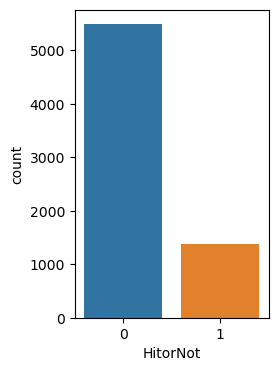

In [64]:
makeCountPlot(data=y_train)

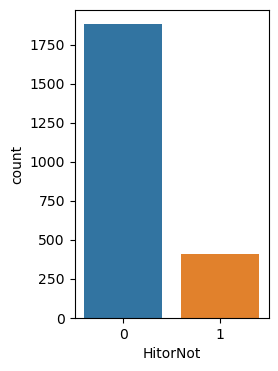

In [65]:
makeCountPlot(data=y_test)

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# model = GaussianNB()
#model = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=1400, max_depth=500, max_features=None)

#clf.fit(x_train,y_train)

#rfcpred = clf.predict(x_val)

In [67]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=500, max_features=None, n_estimators=1400)

In [68]:
pred = model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1930
           1       0.62      0.71      0.66       361

    accuracy                           0.89      2291
   macro avg       0.78      0.81      0.80      2291
weighted avg       0.89      0.89      0.89      2291



it was 100 last time

<Axes: >

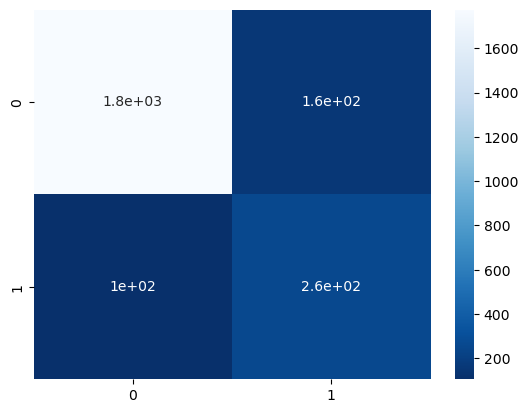

In [69]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True, cmap='Blues_r')

<Axes: >

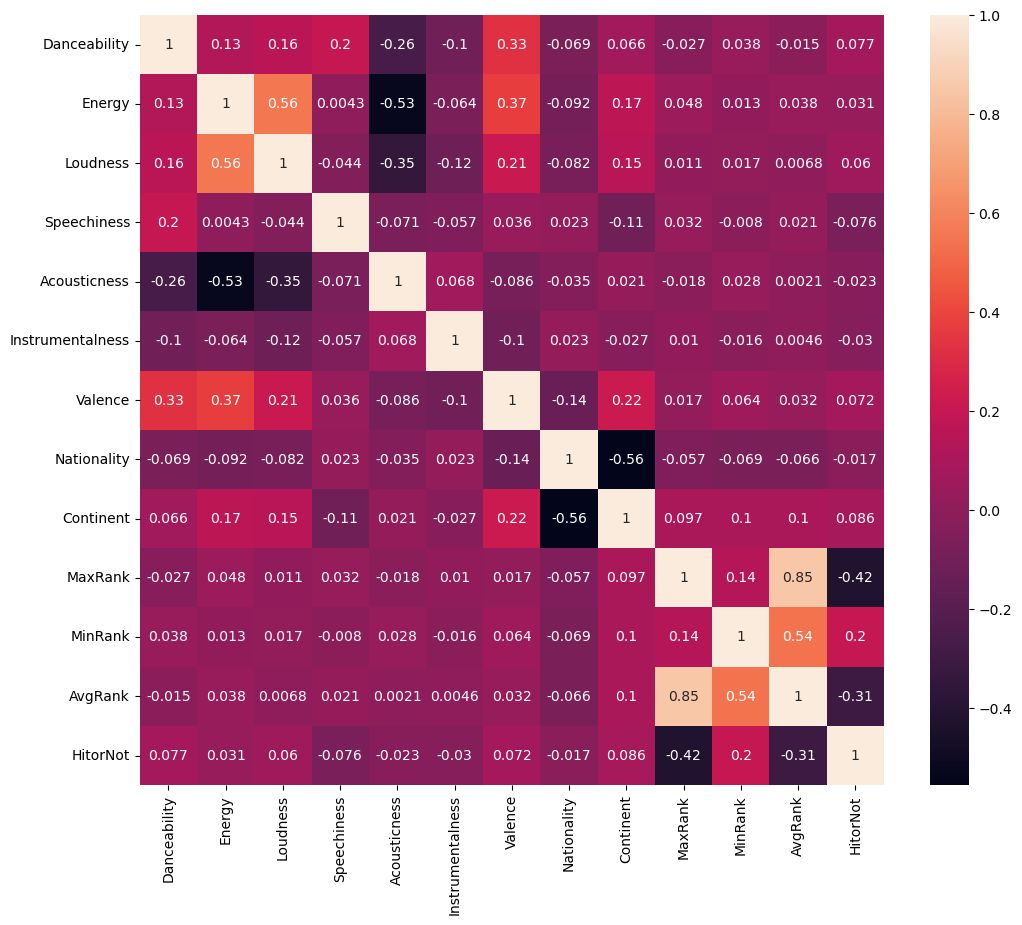

In [70]:
sdf = df.drop(['DaysinTop200','Start_Date','Last_Date',],axis =1,inplace = False)
plt.figure(figsize=(12, 10)) # Set the figure size
sns.heatmap(sdf.corr(), annot=True) # Print the heatmap